In [1]:
#import libraries
from pylab import *
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import argrelmax
import poincare
from scipy import interpolate
from scipy import optimize
from numpy import *
import math

In [57]:
mu = 3
A = 15
w = 4.07
dt = 0.001
t = np.arange(0,100,dt)
ics = [2,0]

def deriv(xv0, t):
    x = xv0[0]
    v = xv0[1]
    
    vdot = mu*(1-x**2)*v-x + (A*cos(w*t))
    return(v, vdot)

solutions = odeint(deriv, ics, t)

x = solutions[:,0]
v = solutions[:,1]

print(x,v)

[2.         2.00000648 2.00002584 ... 1.4399728  1.43887651 1.43778462] [ 0.          0.01294164  0.02576705 ... -1.09847608 -1.09409542
 -1.08967782]


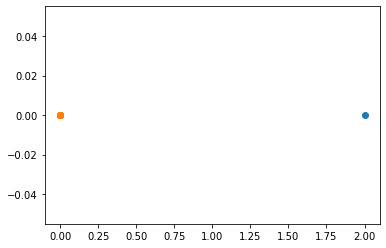

In [62]:
def poincaresection(x,xdot,phi,t,omega,phimod2pi):

    xinterp = interpolate.UnivariateSpline(t, x, s=0, k=3)
    xdotinterp = interpolate.UnivariateSpline(t, xdot, s=0, k=3)
    
    tmax=t[-1]
    
    numzeros=int(floor((tmax*omega)/(2*math.pi)))
        
    phiroot=0
    i=1
    
    xpoincare=zeros(numzeros)
    xdotpoincare=zeros(numzeros)
    
    while True:
        phiroot=2*math.pi*i/omega+phimod2pi/omega
        
        if phiroot>tmax:
            break
            
        xpoincare[i-1]=xinterp(phiroot)
        xdotpoincare[i-1]=xdotinterp(phiroot)
        i=i+1

        cutoff = int(numzeros/2)
        return [xpoincare[cutoff:],xdotpoincare[cutoff:]]

phimod2 = 0
phi = w*t

xpc, xdotpc = poincaresection(x,v,phi,t,w,phimod2)

figure(2)
scatter(ics[0], ics[1])
scatter(xpc, xdotpc)
# scatter(xpc, xdotpc)
# plt.xlabel("x")
# plt.ylabel("xdot")
# plt.title("Poincare Section")
# plt.savefig("PS 4098")